In [1]:
%matplotlib notebook
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
from data_loader import produce_dataset, get_dataloaders, dataset_plot
from train import *
from test_function import *
from model_nn import Koopman
import numpy as np
import torch
initial_out = sys.stdout

In [ ]:
x_range = np.array([2.,2.,np.pi])
u_range = np.array([1.5,0.5])
SimLength=10
Ntraj = 100000
Ts=0.1
path = produce_dataset(x_range,u_range,SimLength,Ntraj,Ts)
sys.stdout = initial_out
print(path)
dataset_plot(path,num=500)

In [ ]:
K = 8
arg = {
    'encoder':[3,32,64,K],
    'decoder':[K+3,128,64,32,3],
    'type':'unmasked',
    'hyper':[1.0,3.0,0.3,1e-7,1e-7,1e-7,0.,10],
    'optim':['Adam',1e-3],#first give the optimizer name, then earning rate. For Adadelta, also need forgetting rate
    'batch size': 16
}

epochs = 20
# get dataloaders
train_loader, val_loader, test_loader = get_dataloaders(path,arg['batch size'])

# start training
file_name = train_the_model(train_loader, val_loader, arg, epochs)
save_model_as_numpy(file_name)

In [ ]:
test_the_model(test_loader, file_name)
print(file_name)

<IPython.core.display.Javascript object>


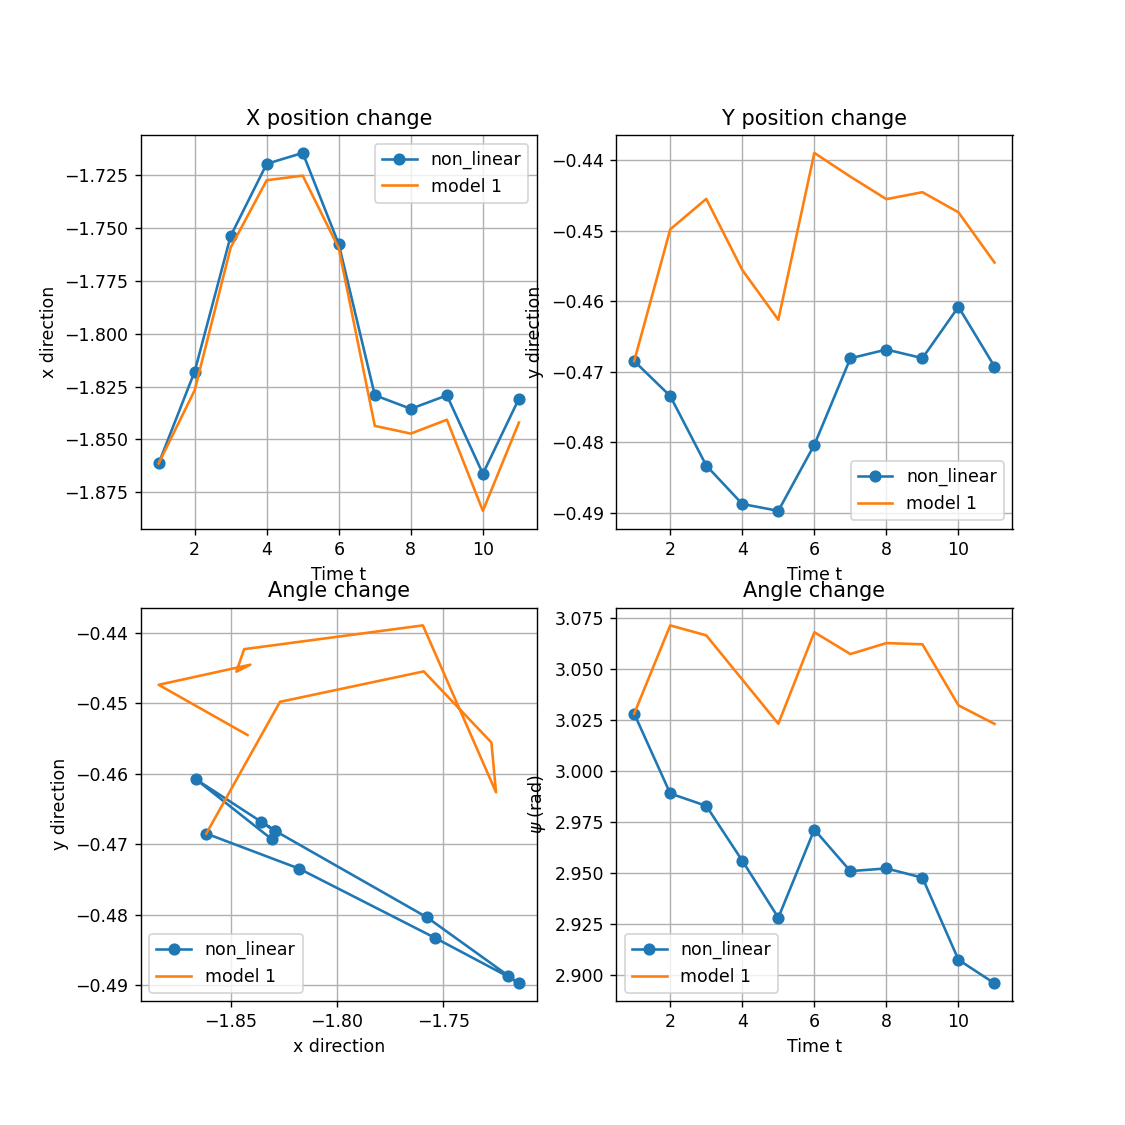

In [3]:
path = './dataset/state-[2.         2.         3.14159265]_input-[1.5 0.5]_10x100000_Ts_0.1'
file_names = [
    'unmasked_Adam_lr_0.001_hyper_[1.0, 3.0, 0.3, 1e-07, 1e-07, 1e-07, 0.0, 10]_batch_16-07-14-06-27',
]
result_sample(path,file_names,index=251)